# Informal Employment, Wages, and Education Analysis Across Mexico

Informal employment can be a big barrier to economic development. The purpose of this notebook is to get more specific on Mexico's situation, and how these metrics vary across geographic regions.
1. What is the wage breakdown across each region and how has this varied over time?
2. Are there strong associations between informal employment and wages?
3. What does access to education and professional training opportunities look like for each region and how does that correlate to labor informality?    

In this notebook, we explore these questions and provide a thread to look into income inequality in Mexico. 

This notebook utlilizes wages data from INEGI's indicators bank (https://en.www.inegi.org.mx/app/indicadores/) and specifically pulls data from 21 datasets across the wage category and demographics. Specifically, they are:
- The income bracket (minimum wage, 1 to 2 times minimum wage, etc.)
- Men and women (all, men, women)

These datasets can also be downloaded from the website by going to the bank indicators website, going to "Demography and Society > Employment and occupation > Employed Population with incomes of ... 15 years and older, ... (Number of people)"

These datasets were all compiled into the CSV file "Wage_Data_Mexican_States.csv" and were then cleaned before used for analysis. Below is the code used to clean the CSV file and make the plots. Commentary on the plots is provided. While some plots are provided in this notebook, there are a lot more that can be produced from the data, and further exploration is encouraged. The cleaned dataset is provided in this notebook so it can be exported if desired.   

This notebook also uses a dataset called "Employment_Mexico_Region_2021_2024.csv" that takes employment data (as explained in the "Employment Across Geographical Regions and Unemployment Rates.ipynb" notebook) and uses it to calculate informal employment rates. These informal employment rates are then plotted against wage data.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Wage Breakdown in Each Region, Association with Informal Employment

In [2]:
df = pd.read_csv('datasets/Wage_Data_Mexican_States.csv', encoding="ISO-8859-1")

In [3]:
df['Indicator'].unique()

array(['Demography and Society > Employment and Occupation > Employment and occupation > Employed population with incomes of a minimum wage-15 years and over (Number of people) Quarterly  /a /f1',
       'Demography and Society > Employment and Occupation > Employment and occupation > Employed population with incomes of a minimum wage-15 years and over  men (Number of people) Quarterly  /a /f1',
       'Demography and Society > Employment and Occupation > Employment and occupation > Employed population with incomes of a minimum wage-15 years and over  women (Number of people) Quarterly  /a /f1',
       'Demography and Society > Employment and Occupation > Employment and occupation > Employed population with incomes over 1 to 2 times minimum wages-15 years and over (Number of people) Quarterly  /a /f1',
       'Demography and Society > Employment and Occupation > Employment and occupation > Employed population with incomes over 1 to 2 times minimum wages-15 years and over  men (Number o

These indicator categories are too long, shorten them with a function

In [4]:
import re
def shortenIndicators(indicator):
    # Dictionary of patterns to translate to
    indPatterns = {
        r'[\w\s>]*incomes of a minimum wage': 'Min wage',
        r'[\w\s>]*1 to 2 times minimum wages': '1-2x min wage',
        r'[\w\s>]*2 to 3 times minimum wages': '2-3x min wage',
        r'[\w\s>]*3 to 5 times minimum wages': '3-5x min wage',
        r'[\w\s>]*over 5 times minimum wages': '>5x min wage',
        r'[\w\s>]*does not receive incomes' : 'No income',
        r'[\w\s>]*unspecified incomes': 'Unspecified'
    }
    # Match the correct shortened version up
    for k, v in indPatterns.items():
        if re.match(k, indicator):
            indicator = re.sub(k, v, indicator)
    
    # Remove extra spaces and the trailing characters
    indicator = indicator.replace(' (Number of people) Quarterly  /a /f1', '')
    indicator = indicator.replace('  men', ', men')
    indicator = indicator.replace('  women', ', women')
    
    # Add an all category to be more specific
    if ('men' not in indicator) and ('women' not in indicator):
        indicator = indicator + ', all'
    return indicator

df.loc[:, 'Indicator'] = df.loc[:, 'Indicator'].map(shortenIndicators)
df.loc[:, 'Geographic area'] = df.loc[:, 'Geographic area'].map(lambda x: x[3:])

In [5]:
df.head()

,Indicator,Geographic area,2023/01,2023/02,2023/03,2023/04,2024/01,2024/02,2024/03,2024/04
0,"Min wage-15 years and over, all",Estados Unidos Mexicanos,20971572,20368429,19681392,19548314,23392875,22588453,22266608,21445293
1,"Min wage-15 years and over, all",Aguascalientes,123841,107450,111184,95899,149252,126720,118307,126383
2,"Min wage-15 years and over, all",Baja California,511974,485449,416850,432888,587144,555580,531774,505263
3,"Min wage-15 years and over, all",Baja California Sur,89421,94888,90030,79905,105675,102404,99156,88264
4,"Min wage-15 years and over, all",Campeche,190181,184396,173837,171460,208555,193418,189146,181798


Find the proportion of people in a wage category for each region and each time period   
Have to group by geographic area for each sex (all, men, women)

In [6]:
# Separate dataframes for men, women, and all by searching for the correct keyword (all, men, women)
men_and_women = df[df['Indicator'].str.find(', all') != -1] #if the .find() method doesn't return -1, the substring exists
men = df[df['Indicator'].str.find(', men') != -1]
women = df[df['Indicator'].str.find(', women') != -1]

In [7]:
# Calculate totals for each geographic region under each sex demographic
columns = ['2023/01', '2023/02', '2023/03', '2023/04', '2024/01', '2024/02', '2024/03', '2024/04']
men_and_women_total = men_and_women.groupby('Geographic area')[columns].agg('sum')
men_total = men.groupby('Geographic area')[columns].agg('sum')
women_total = women.groupby('Geographic area')[columns].agg('sum')

Have to divide each region in the respective demographic by the total for the region in that demographic

In [8]:
# Set a heirarchical index to Indicator -> Geographic area so the indices align
# This will do element-wise division on each geographic area within each demographic category
# Returns percentages
men_and_women_prop = (men_and_women.set_index(['Indicator', 'Geographic area'])/men_and_women_total)*100
men_prop = (men.set_index(['Indicator', 'Geographic area'])/men_total)*100
women_prop = (women.set_index(['Indicator', 'Geographic area'])/women_total)*100

In [9]:
men_and_women_prop

2023/01  \
Indicator                          Geographic area                              
Min wage-15 years and over, all    Estados Unidos Mexicanos         35.853667   
                                   Aguascalientes                   19.151519   
                                   Baja California                  28.562120   
                                   Baja California Sur              20.561278   
                                   Campeche                         44.081032   
...                                                                       ...   
Unspecified-15 years and over, all Tamaulipas                        9.256365   
                                   Tlaxcala                          9.922851   
                                   Veracruz de Ignacio de la Llave  13.559234   
                                   Yucatán                           7.298308   
                                   Zacatecas                        19.772175   

                                                                      2023/02  \
Indicator                          Geographic area                              
Min wage-15 years and over, all    Estados Unidos Mexicanos         34.804744   
                                   Aguascalientes                   16.852126   
                                   Baja California                  26.912857   
                                   Baja California Sur              20.797279   
                                   Campeche                         42.591485   
...                                                                       ...   
Unspecified-15 years and over, all Tamaulipas                        8.414312   
                                   Tlaxcala                         12.053622   
                                   Veracruz de Ignacio de la Llave  13.757942   
                                   Yucatán                           6.846705   
                                   Zacatecas                        19.856746   

                                                                      2023/03  \
Indicator                          Geographic area                              
Min wage-15 years and over, all    Estados Unidos Mexicanos         33.263872   
                                   Aguascalientes                   16.694144   
                                   Baja California                  23.005170   
                                   Baja California Sur              19.558388   
                                   Campeche                         39.954354   
...                                                                       ...   
Unspecified-15 years and over, all Tamaulipas                        9.262874   
                                   Tlaxcala                         12.310027   
                                   Veracruz de Ignacio de la Llave  16.429558   
                                   Yucatán                           7.175430   
                                   Zacatecas                        23.539675   

                                                                      2023/04  \
Indicator                          Geographic area                              
Min wage-15 years and over, all    Estados Unidos Mexicanos         32.907433   
                                   Aguascalientes                   15.004475   
                                   Baja California                  23.847149   
                                   Baja California Sur              17.389365   
                                   Campeche                         38.827520   
...                                                                       ...   
Unspecified-15 years and over, all Tamaulipas                        9.992436   
                                   Tlaxcala                         11.764697   
                                   Veracruz de Ignacio de la Llave  11.827586   
                 

### Visualization

In [10]:
# Create visualization function
def wageBracketOverTime(region):
    # Set initial data and figure
    data = men_and_women_prop.loc[(slice(None), region), :]
    x = data.columns
    labels = [indicator for indicator, region in data.index]
    plt.figure()
    
    # Generate line plots for each label
    for i in range(len(data)):
        y = data.iloc[i, :]
        plt.plot(x, y, label=labels[i])
        plt.scatter(x, y)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.xlabel('Quarter')
    plt.ylabel('Proportion (%)')
    plt.title(f'Wage breakdown in {region} from 2023 to 2024')
    plt.show()

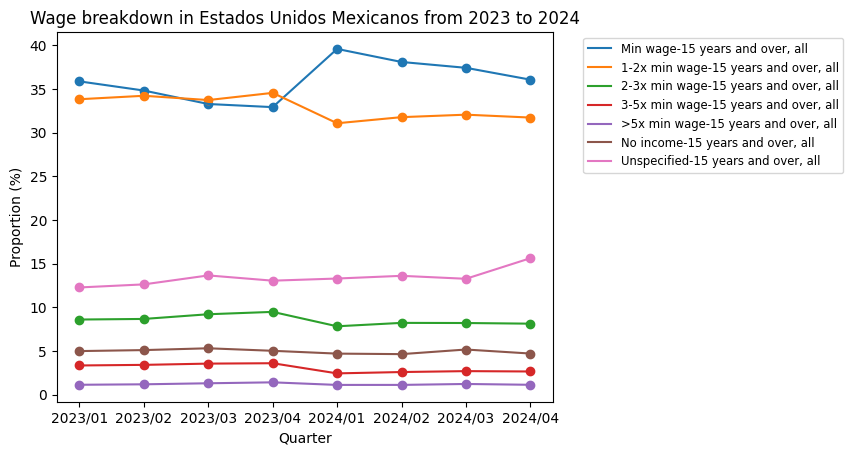

In [11]:
# Figure for Mexico as a whole
wageBracketOverTime('Estados Unidos Mexicanos')

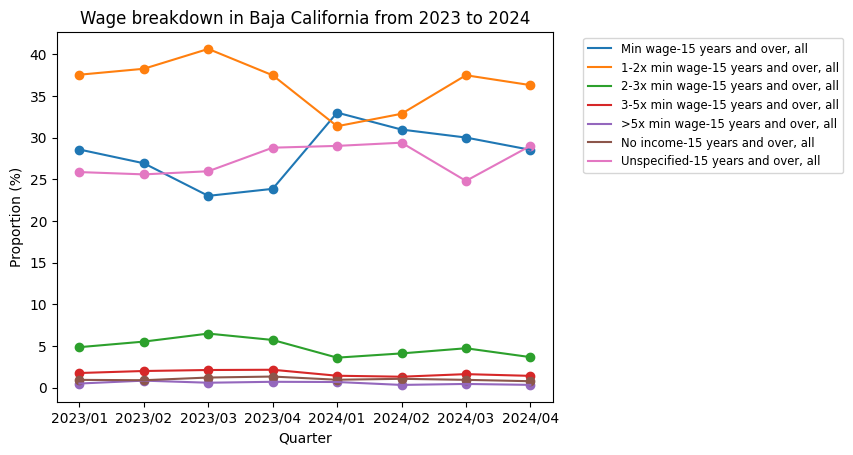

In [12]:
# Figure for Baja California
wageBracketOverTime('Baja California')

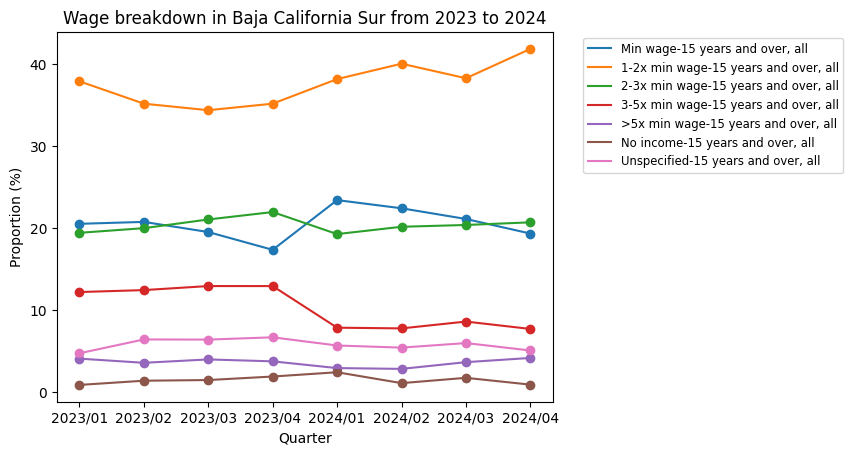

In [13]:
# Figure for Baja California Sur
wageBracketOverTime('Baja California Sur')

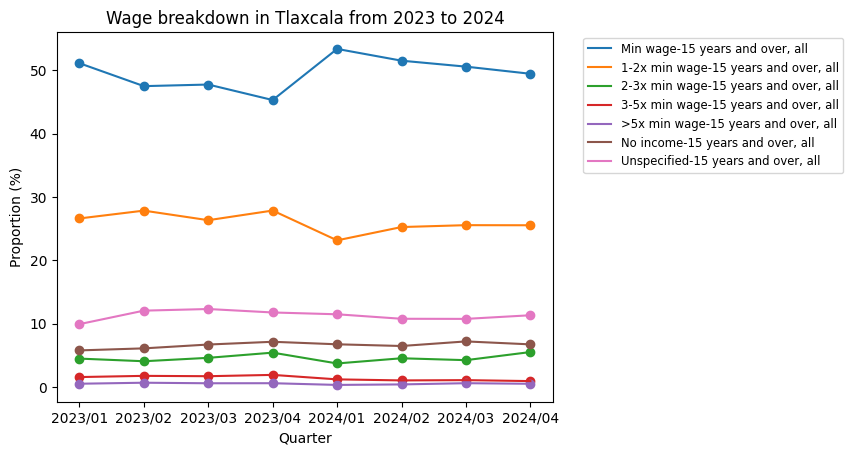

In [14]:
# Figure for Tlaxcala
wageBracketOverTime('Tlaxcala')

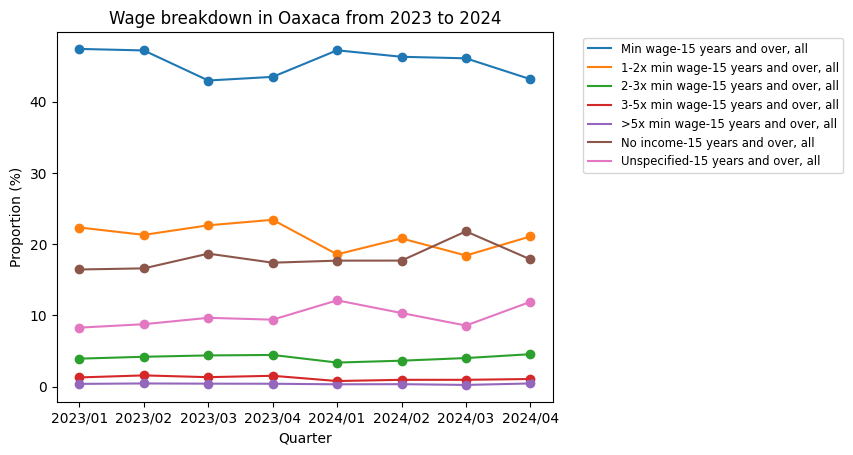

In [15]:
# Figure for Oaxaca
wageBracketOverTime('Oaxaca')

As a whole, Mexico has a pretty stratified income landscape, with around 40% of the population making minimum wage in Q1 of 2024, less than 5% making 3-5x the minimum wage, and even less making >5x the minimum wage. There seems to have been an event in Q1 of 2024 where the income gaps were exacerbated, but seems to be stabilizing towards the present. The proportion of people within various income bracket levels seems to vary across regions, with more northwestern regions having greater proportions making 1-2x the minimum wage, and more southeastern regions making the minimum wage or no income at all.

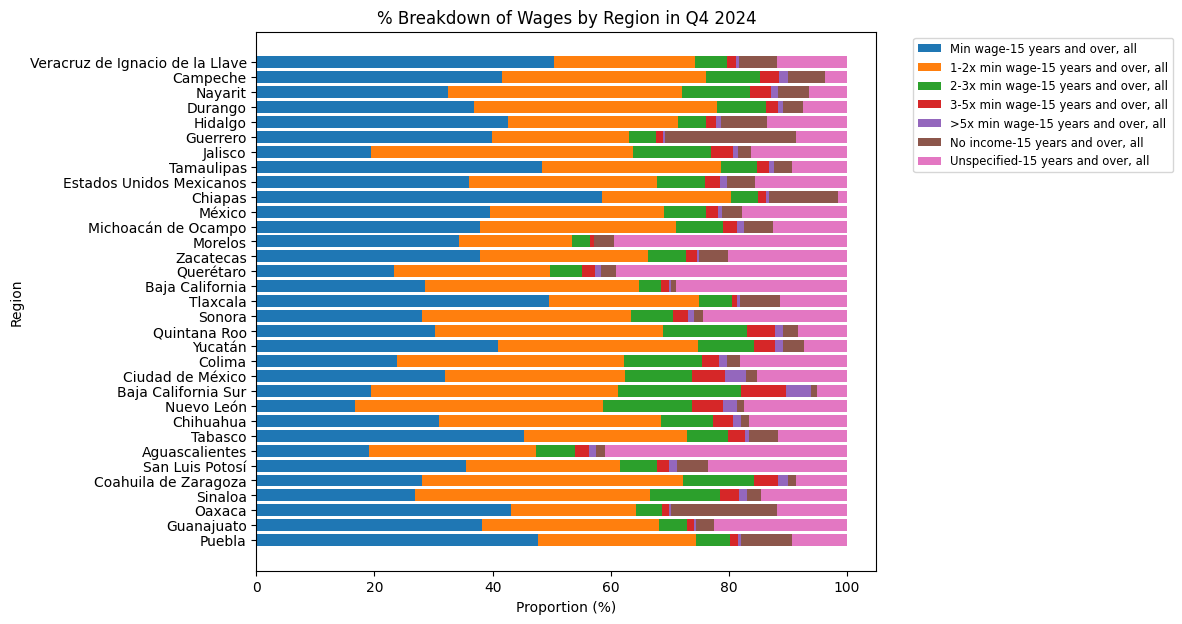

In [16]:
# Look at the percent breakdown of wages in Q4 2024 across all regions of Mexico
plt.figure(figsize=(8, 7))
used_labels = set()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']

for region in set(region for indicator, region in men_and_women_prop.index):
    data = men_and_women_prop.loc[(slice(None), region), '2024/04']
    labels = [indicator for indicator, region in data.index]
    x = [region for indicator, region in data.index]
    y = data.values
    left = 0
    for i in range(len(labels)):
        if labels[i] in used_labels:
            plt.barh(x, y[i], left=left, color=colors[i])
            left += y[i]
        else:
            plt.barh(x, y[i], left=left, label=labels[i], color=colors[i])
            left += y[i]
            used_labels.add(labels[i])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.xlabel('Proportion (%)')
plt.ylabel('Region')
plt.title('% Breakdown of Wages by Region in Q4 2024')
plt.show()

This figure shows that the highest proportion of minimum wage lie in regions of:
- Puebla
- Chiapas
- Veracruz de Ignacio de la Llave
- Tamaulipas
- Hidalgo
- Tlaxala
- Tabasco
    
Some regions even have comparatively high percentages of workers that don't recieve an income including:
- Guerro
- Oaxaca
- Chiapas
- Puebla 
    
Regions that have higher concentrations of employees are in higher wage brackets:
- Baja California Sur
- Quintana Roo
- Sinaloa
- Ciudad de Mexico

**Is there a correlation between informal employment and wage? Where does this hold most true?**

In [17]:
# Read in dataset
df_employment = pd.read_csv('datasets/Employment_Mexico_Region_2021_2024.csv', encoding="ISO-8859-1") #Latin-1 encoding
df_employment.head(5)

,Indicator,Geographic area,2023/01,2023/02,2023/03,2023/04,2024/01,2024/02,2024/03,2024/04
0,Employed population in informal sector 15 yrs ...,00 Estados Unidos Mexicanos,16506302,16535606,16707970,16789898,16459370,16691011,16730767,17020710
1,Employed population in informal sector 15 yrs ...,01 Aguascalientes,128351,131325,136125,126344,127771,134214,137393,153072
2,Employed population in informal sector 15 yrs ...,02 Baja California,333103,329676,338955,364927,327536,314600,327759,333045
3,Employed population in informal sector 15 yrs ...,03 Baja California Sur,78518,82645,85367,84856,83925,82665,81402,80958
4,Employed population in informal sector 15 yrs ...,04 Campeche,121152,121715,113400,116863,120117,119864,122121,124696


In [18]:
# Separate the informal class from the total working population
informal = df_employment[df_employment['Indicator'].str.contains('informal sector')].reset_index(drop=True)
employed = df_employment[df_employment['Indicator'].str.contains('Employed population-15 years and over')].reset_index(drop=True)
unemployed = df_employment[df_employment['Indicator'].str.contains('Unemployed')].reset_index(drop=True)

# Perform the division
prop_informal = (informal.iloc[:, 3:].div(employed.iloc[:, 3:]))*100
prop_informal.insert(0, 'Geographic area', informal['Geographic area'])

# Trim the numbers off geographic area (first 3 characters)
prop_informal['Geographic area'] = prop_informal['Geographic area'].apply(lambda x: x[3:])
prop_informal.set_index('Geographic area', inplace=True)

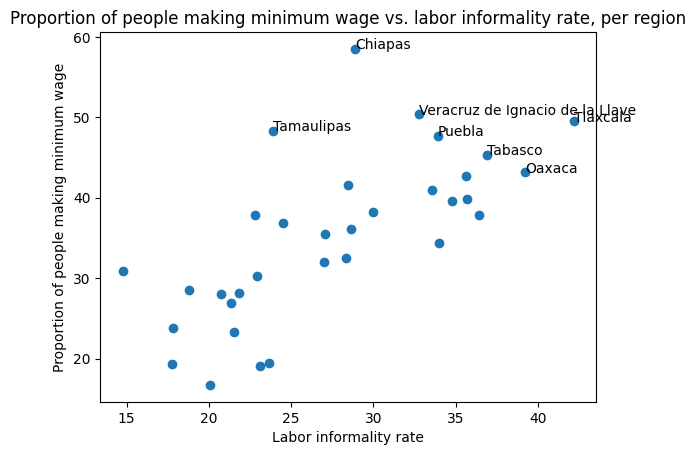

In [19]:
# Plotting initial scatter plot
plt.figure()
y = men_and_women_prop.loc['Min wage-15 years and over, all', '2024/04']
x = prop_informal.loc[:, '2024/04']
plt.scatter(x, y)

# Marking poins of interest (poi)
for i in range(len(x)):
    if x.iloc[i] >= 37.5 or y.iloc[i] >= 45:
        poi = x.index[i]
        plt.annotate(poi, (x.iloc[i], y.iloc[i]))
        
# Labeling axes
plt.ylabel('Proportion of people making minimum wage')
plt.xlabel('Labor informality rate')
plt.title('Proportion of people making minimum wage vs. labor informality rate, per region')
plt.show()

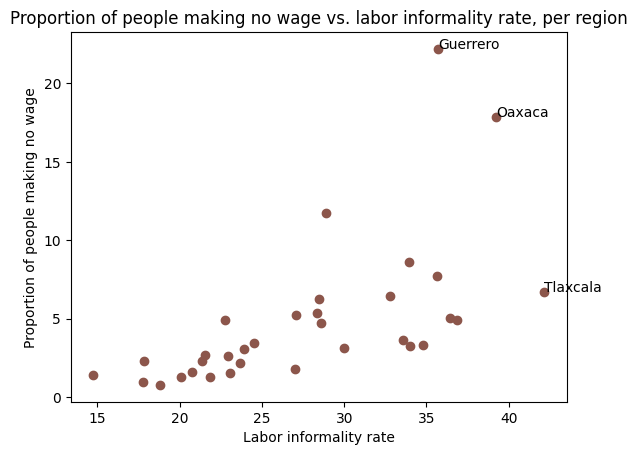

In [20]:
plt.figure()
y = men_and_women_prop.loc['No income-15 years and over, all', '2024/04']
x = prop_informal.loc[:, '2024/04']
plt.scatter(x, y, color='tab:brown')

# Marking poins of interest (poi)
for i in range(len(x)):
    if x.iloc[i] >= 37.5 or y.iloc[i] >= 15:
        poi = x.index[i]
        plt.annotate(poi, (x.iloc[i], y.iloc[i]))
        
plt.ylabel('Proportion of people making no wage')
plt.xlabel('Labor informality rate')
plt.title('Proportion of people making no wage vs. labor informality rate, per region')
plt.show()

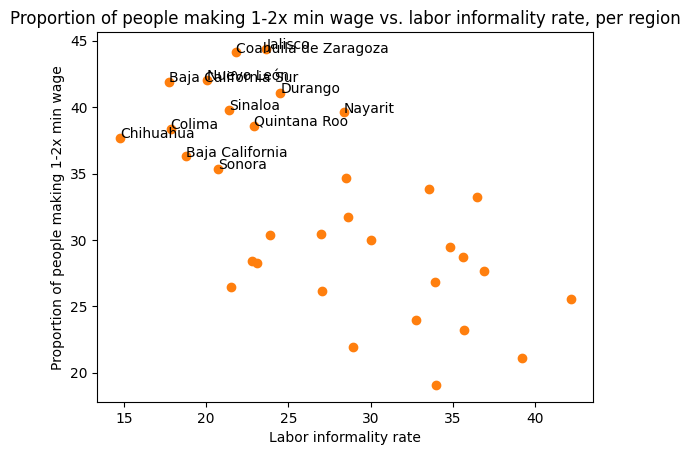

In [21]:
plt.figure()
y = men_and_women_prop.loc['1-2x min wage-15 years and over, all', '2024/04']
x = prop_informal.loc[:, '2024/04']
plt.scatter(x, y, color='tab:orange')

# Marking poins of interest (poi)
for i in range(len(x)):
    if x.iloc[i] <= 20 or y.iloc[i] >= 35:
        poi = x.index[i]
        plt.annotate(poi, (x.iloc[i], y.iloc[i]))

plt.ylabel('Proportion of people making 1-2x min wage')
plt.xlabel('Labor informality rate')
plt.title('Proportion of people making 1-2x min wage vs. labor informality rate, per region')
plt.show()

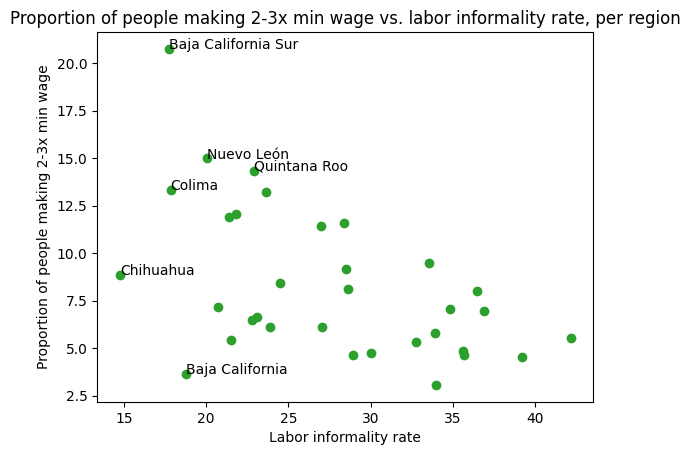

In [22]:
plt.figure()
y = men_and_women_prop.loc['2-3x min wage-15 years and over, all', '2024/04']
x = prop_informal.loc[:, '2024/04']
plt.scatter(x, y, color='tab:green')

# Marking poins of interest (poi)
for i in range(len(x)):
    if x.iloc[i] <= 20 or y.iloc[i] >= 14:
        poi = x.index[i]
        plt.annotate(poi, (x.iloc[i], y.iloc[i]))

plt.ylabel('Proportion of people making 2-3x min wage')
plt.xlabel('Labor informality rate')
plt.title('Proportion of people making 2-3x min wage vs. labor informality rate, per region')
plt.show()

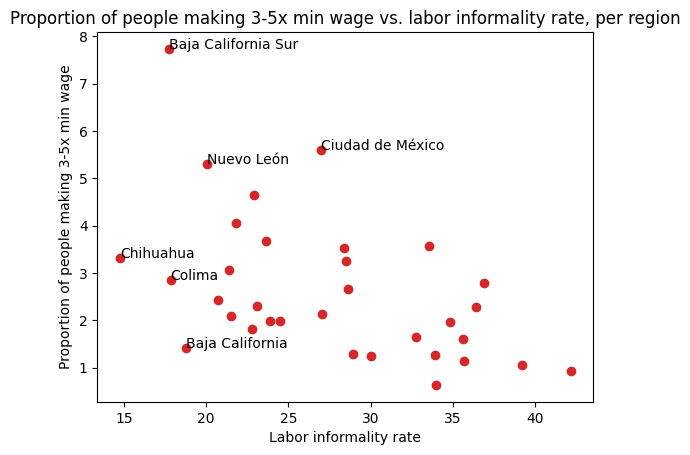

In [23]:
plt.figure()
y = men_and_women_prop.loc['3-5x min wage-15 years and over, all', '2024/04']
x = prop_informal.loc[:, '2024/04']
plt.scatter(x, y, color='tab:red')

# Marking poins of interest (poi)
for i in range(len(x)):
    if x.iloc[i] <= 20 or y.iloc[i] >= 5:
        poi = x.index[i]
        plt.annotate(poi, (x.iloc[i], y.iloc[i]))
        
plt.ylabel('Proportion of people making 3-5x min wage')
plt.xlabel('Labor informality rate')
plt.title('Proportion of people making 3-5x min wage vs. labor informality rate, per region')
plt.show()

From these plots, there is a relationship beteween labor informality and the wages earned.

In general, it seems that the further southeast you go in Mexico, the lower earning potential there is, and the more labor informality there is.

## Earning Potential, Informal Employment, and Educational and Training Opportunity

Datasets   
1. Average grade of schooling of the population aged 15 years and over state according to gender: https://en.www.inegi.org.mx/app/tabulados/interactivos/?pxq=Educacion_Educacion_05_2f6d2a08-babc-442f-b4e0-25f7d324dfe0&idrt=15&opc=t
2. Population aged 15 years and older by state according to literacy status https://en.www.inegi.org.mx/temas/educacion/#tabular_data

Parse the datasets

In [24]:
path = "datasets/Average Grade of Education Completed by Sex 2010-2020.xlsx"

# Parse Excel file and make the first column the index
education = pd.read_excel(path, index_col = 0, skiprows=[0])

# Create a clean hierarchical header
education_columns = pd.MultiIndex.from_product([[2010, 2015, 2020], ['Total', 'Men', 'Women']], names=['Year', 'Sex'])

# Replace original column headers with new ones
education = pd.DataFrame(education.values, index=education.index, columns=education_columns)
education.head()

Year                      2010              2015               2020         \
Sex                      Total   Men Women Total   Men Women  Total    Men   
Entidad federativa                                                           
Estados Unidos Mexicanos  8.63  8.79  8.48  9.16  9.33  9.01   9.74   9.84   
Aguascalientes            9.23  9.30  9.17  9.73  9.82  9.64  10.35  10.38   
Baja California           9.26  9.33  9.20  9.76  9.84  9.68  10.20  10.22   
Baja California Sur       9.40  9.37  9.42  9.91  9.92  9.89  10.34  10.28   
Campeche                  8.51  8.71  8.32  9.14  9.35  8.94   9.63   9.74   

Year                             
Sex                       Women  
Entidad federativa               
Estados Unidos Mexicanos   9.64  
Aguascalientes            10.32  
Baja California           10.18  
Baja California Sur       10.40  
Campeche                   9.52

In [25]:
path = "datasets/Literacy Status by Region 2020.xlsx"

# Parse Excel file and make the first column the index
literacy = pd.read_excel(path, index_col = 0)

#Translate the column headers
literacy.rename({'Total': 'Total', 'Alfabeta': 'Literate', 'Analfabeta': 'Illiterate', 'No especificado': 'Unknown'}, axis=1, inplace=True)
literacy.head()

,Total,Literate,Illiterate,Unknown
Entidad federativa,,,,
Estados Unidos Mexicanos,93985354,89320723,4456431,208200
Aguascalientes,1038904,1015427,21908,1569
Baja California,2882498,2817601,52496,12401
Baja California Sur,597552,582156,13926,1470
Campeche,682951,642004,39986,961


Calculate regional literacy rates

In [26]:
literacy['Rate_Literate'] = (literacy['Literate']/literacy['Total'])*100
literacy['Rate_Illiterate'] = (literacy['Illiterate']/literacy['Total'])*100
literacy['Rate_Unknown'] = (literacy['Unknown']/literacy['Total'])*100
literacy.head()

,Total,Literate,Illiterate,Unknown,Rate_Literate,Rate_Illiterate,Rate_Unknown
Entidad federativa,,,,,,,
Estados Unidos Mexicanos,93985354,89320723,4456431,208200,95.036853,4.741623,0.221524
Aguascalientes,1038904,1015427,21908,1569,97.740215,2.108761,0.151025
Baja California,2882498,2817601,52496,12401,97.748585,1.821198,0.430217
Baja California Sur,597552,582156,13926,1470,97.423488,2.330508,0.246004
Campeche,682951,642004,39986,961,94.004401,5.854886,0.140713


### Visualization

Plot illiteracy rate and literacy rate against labor informality for each region

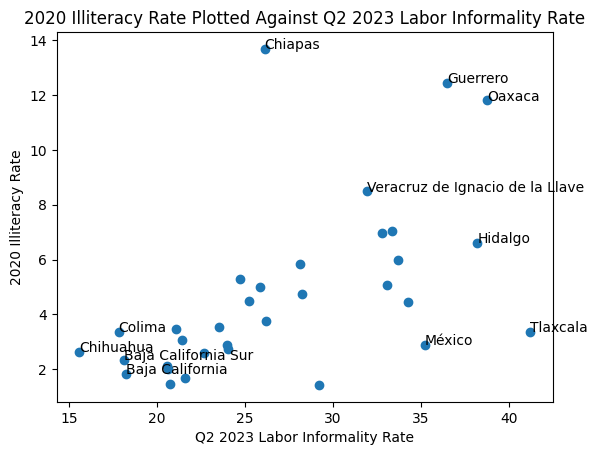

In [27]:
plt.figure()
x = prop_informal['2023/02'] # choose this quarter since it is closest to 2020, latest available literacy data
y = literacy['Rate_Illiterate']
plt.scatter(x, y)

# Mark interesting points
for i in range(len(x)):
    if x.iloc[i] >= 35 or y.iloc[i] >= 8:
        plt.annotate(x.index[i], (x.iloc[i], y.iloc[i]))
    if x.iloc[i] <= 20 and y.iloc[i] <= 4:
        plt.annotate(x.index[i], (x.iloc[i], y.iloc[i]))

plt.xlabel('Q2 2023 Labor Informality Rate')
plt.ylabel('2020 Illiteracy Rate')
plt.title('2020 Illiteracy Rate Plotted Against Q2 2023 Labor Informality Rate')
plt.show()

Plot average grade of schooling against labor informality rate

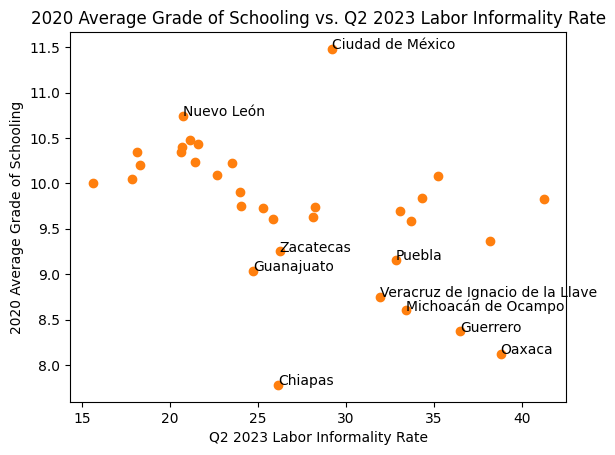

In [28]:
plt.figure()
y = education.loc[:, (2020, 'Total')]
plt.scatter(x, y, color='tab:orange')

# Mark interesting points
for i in range(len(x)):
    if y.iloc[i] <= 9.3 or y.iloc[i] >= 10.5:
        plt.annotate(y.index[i], (x.iloc[i], y.iloc[i]))

plt.xlabel('Q2 2023 Labor Informality Rate')
plt.ylabel('2020 Average Grade of Schooling')
plt.title('2020 Average Grade of Schooling vs. Q2 2023 Labor Informality Rate')
plt.show()

From these two scatter plots, we are seeing more and more patterns between certain regions. Regions like Guerrero, Chiapas, and Oaxaca have lower average grades of schooling, and higher labor informality rates. They also have higher rates of illiteracy, showing a correlation between education and labor informality rates. While this doesn't prove that education determines labor informality, it does show that they are related.

## Quantifying Income Inequality and Labor Informality

The purpose of this section is an attempt to quantify any potential income inequality. This is based off the idea of a Lorenz plot, where the proportion of the total income someone makes is plotted against the proportion of people making that income. Below is an equation that attempts to calculate the total income and the proportion of total income owned by that bracket.   

$MW = $minimum wage    
$MW_a = $proportion of people in the respective income bracket   
$a=$ income bracket    
$totalIncome = MW*MW_1 + 2MW*MW_2 + 3MW*MW_3 + 4MW*MW_4 + 5MW*MW_5$   
$totalIncome = MW(MW_1 + 2MW_2 + 3MW_3 + 4MW_4 + 5MW_5)$   
    
$propIncome = \Large\frac{a*MW*MW_a}{MW(MW_1 + 2MW_2 + 3MW_3 + 4MW_4 + 5MW_5)}$    
    
$propIncome = \Large\frac{a*MW_a}{MW_1 + 2MW_2 + 3MW_3 + 4MW_4 + 5MW_5}$

Data manipulation to calculate proportion of owned income

In [29]:
men_women_prop_2024Q4 = men_and_women_prop.loc[:, '2024/04'].to_frame().rename({'2024/04': 'MW_a'}, axis=1)
men_women_prop_2024Q4

MW_a
Indicator                          Geographic area                           
Min wage-15 years and over, all    Estados Unidos Mexicanos         36.050055
                                   Aguascalientes                   19.058786
                                   Baja California                  28.527671
                                   Baja California Sur              19.374070
                                   Campeche                         41.518431
...                                                                       ...
Unspecified-15 years and over, all Tamaulipas                        9.359728
                                   Tlaxcala                         11.324440
                                   Veracruz de Ignacio de la Llave  11.798614
                                   Yucatán                           7.222195
                                   Zacatecas                        20.135260

[231 rows x 1 columns]

In [30]:
# Determine the coefficient for each proportion in the equation
def findWeights(indicator):
    weights = {
        'Min wage-15 years and over, all': 1,
        '1-2x min wage-15 years and over, all': 2,
        '2-3x min wage-15 years and over, all': 3,
        '3-5x min wage-15 years and over, all': 4,
        '>5x min wage-15 years and over, all': 5,
        'No income-15 years and over, all': 0,
        'Unspecified-15 years and over, all': 0
    }
    return weights[indicator]

men_women_prop_2024Q4['a'] = pd.Series(map(findWeights, [t[0] for t in men_women_prop_2024Q4.index]), index=men_women_prop_2024Q4.index)
men_women_prop_2024Q4

MW_a  \
Indicator                          Geographic area                              
Min wage-15 years and over, all    Estados Unidos Mexicanos         36.050055   
                                   Aguascalientes                   19.058786   
                                   Baja California                  28.527671   
                                   Baja California Sur              19.374070   
                                   Campeche                         41.518431   
...                                                                       ...   
Unspecified-15 years and over, all Tamaulipas                        9.359728   
                                   Tlaxcala                         11.324440   
                                   Veracruz de Ignacio de la Llave  11.798614   
                                   Yucatán                           7.222195   
                                   Zacatecas                        20.135260   

                                                                    a  
Indicator                          Geographic area                     
Min wage-15 years and over, all    Estados Unidos Mexicanos         1  
                                   Aguascalientes                   1  
                                   Baja California                  1  
                                   Baja California Sur              1  
                                   Campeche                         1  
...                                                                ..  
Unspecified-15 years and over, all Tamaulipas                       0  
                                   Tlaxcala                         0  
                                   Veracruz de Ignacio de la Llave  0  
                                   Yucatán                          0  
                                   Zacatecas                        0  

[231 rows x 2 columns]

In [31]:
# Multiply the proportion of the income by the weight
men_women_prop_2024Q4['a*MW_a'] = men_women_prop_2024Q4['MW_a']*men_women_prop_2024Q4['a']
men_women_prop_2024Q4

MW_a  \
Indicator                          Geographic area                              
Min wage-15 years and over, all    Estados Unidos Mexicanos         36.050055   
                                   Aguascalientes                   19.058786   
                                   Baja California                  28.527671   
                                   Baja California Sur              19.374070   
                                   Campeche                         41.518431   
...                                                                       ...   
Unspecified-15 years and over, all Tamaulipas                        9.359728   
                                   Tlaxcala                         11.324440   
                                   Veracruz de Ignacio de la Llave  11.798614   
                                   Yucatán                           7.222195   
                                   Zacatecas                        20.135260   

                                                                    a  \
Indicator                          Geographic area                      
Min wage-15 years and over, all    Estados Unidos Mexicanos         1   
                                   Aguascalientes                   1   
                                   Baja California                  1   
                                   Baja California Sur              1   
                                   Campeche                         1   
...                                                                ..   
Unspecified-15 years and over, all Tamaulipas                       0   
                                   Tlaxcala                         0   
                                   Veracruz de Ignacio de la Llave  0   
                                   Yucatán                          0   
                                   Zacatecas                        0   

                                                                       a*MW_a  
Indicator                          Geographic area                             
Min wage-15 years and over, all    Estados Unidos Mexicanos         36.050055  
                                   Aguascalientes                   19.058786  
                                   Baja California                  28.527671  
                                   Baja California Sur              19.374070  
                                   Campeche                         41.518431  
...                                                                       ...  
Unspecified-15 years and over, all Tamaulipas                        0.000000  
                                   Tlaxcala                          0.000000  
                                   Veracruz de Ignacio de la Llave   0.000000  
                                   Yucatán                           0.000000  
                                   Zacatecas                         0.000000  

[231 rows x 3 columns]

In [32]:
# Calculate proportion of income share
men_women_prop_2024Q4['propIncome'] = pd.Series([(men_women_prop_2024Q4.loc[(indicator, region), 'a*MW_a']/men_women_prop_2024Q4.loc[(slice(None), region), 'a*MW_a'].sum())*100 for indicator, region in men_women_prop_2024Q4.index], index=men_women_prop_2024Q4.index)
men_women_prop_2024Q4

MW_a  \
Indicator                          Geographic area                              
Min wage-15 years and over, all    Estados Unidos Mexicanos         36.050055   
                                   Aguascalientes                   19.058786   
                                   Baja California                  28.527671   
                                   Baja California Sur              19.374070   
                                   Campeche                         41.518431   
...                                                                       ...   
Unspecified-15 years and over, all Tamaulipas                        9.359728   
                                   Tlaxcala                         11.324440   
                                   Veracruz de Ignacio de la Llave  11.798614   
                                   Yucatán                           7.222195   
                                   Zacatecas                        20.135260   

                                                                    a  \
Indicator                          Geographic area                      
Min wage-15 years and over, all    Estados Unidos Mexicanos         1   
                                   Aguascalientes                   1   
                                   Baja California                  1   
                                   Baja California Sur              1   
                                   Campeche                         1   
...                                                                ..   
Unspecified-15 years and over, all Tamaulipas                       0   
                                   Tlaxcala                         0   
                                   Veracruz de Ignacio de la Llave  0   
                                   Yucatán                          0   
                                   Zacatecas                        0   

                                                                       a*MW_a  \
Indicator                          Geographic area                              
Min wage-15 years and over, all    Estados Unidos Mexicanos         36.050055   
                                   Aguascalientes                   19.058786   
                                   Baja California                  28.527671   
                                   Baja California Sur              19.374070   
                                   Campeche                         41.518431   
...                                                                       ...   
Unspecified-15 years and over, all Tamaulipas                        0.000000   
                                   Tlaxcala                          0.000000   
                                   Veracruz de Ignacio de la Llave   0.000000   
                                   Yucatán                           0.000000   
                                   Zacatecas                         0.000000   

                                                                    propIncome  
Indicator                          Geographic area                              
Min wage-15 years and over, all    Estados Unidos Mexicanos          25.726166  
                                   Aguascalientes                    17.126274  
                                   Baja California                   23.887866  
                                   Baja California Sur                8.914313  
                                   Campeche                          26.183529  
...                                                                        ...  
Unspecified-15 years and over, all Tamaulipas                         0.000000  
                                   Tlaxcala                           0.000000  
                                   Veracruz de Ignacio de la Llave    0.000000  
                                   Yucatán                            0.000000  
                                   Zacateca

Sanity check

In [33]:
men_women_prop_2024Q4.reset_index(inplace=True)
men_women_prop_2024Q4

,Indicator,Geographic area,MW_a,a,a*MW_a,propIncome
0,"Min wage-15 years and over, all",Estados Unidos Mexicanos,36.050055,1,36.050055,25.726166
1,"Min wage-15 years and over, all",Aguascalientes,19.058786,1,19.058786,17.126274
2,"Min wage-15 years and over, all",Baja California,28.527671,1,28.527671,23.887866
3,"Min wage-15 years and over, all",Baja California Sur,19.374070,1,19.374070,8.914313
4,"Min wage-15 years and over, all",Campeche,41.518431,1,41.518431,26.183529
...,...,...,...,...,...,...
226,"Unspecified-15 years and over, all",Tamaulipas,9.359728,0,0.000000,0.000000
227,"Unspecified-15 years and over, all",Tlaxcala,11.324440,0,0.000000,0.000000
228,"Unspecified-15 years and over, all",Veracruz de Ignacio de la Llave,11.798614,0,0.000000,0.000000
229,"Unspecified-15 years and over, all",Yucatán,7.222195,0,0.000000,0.000000


In [34]:
men_women_prop_2024Q4.groupby('Geographic area')['propIncome'].sum()

Geographic area
Aguascalientes                     100.0
Baja California                    100.0
Baja California Sur                100.0
Campeche                           100.0
Chiapas                            100.0
Chihuahua                          100.0
Ciudad de México                   100.0
Coahuila de Zaragoza               100.0
Colima                             100.0
Durango                            100.0
Estados Unidos Mexicanos           100.0
Guanajuato                         100.0
Guerrero                           100.0
Hidalgo                            100.0
Jalisco                            100.0
Michoacán de Ocampo                100.0
Morelos                            100.0
México                             100.0
Nayarit                            100.0
Nuevo León                         100.0
Oaxaca                             100.0
Puebla                             100.0
Querétaro                          100.0
Quintana Roo                       100.0


The proportions of owned income all add up to 100 for each region

### Visualization

In [35]:
# Define visualization function
def plotPropIncomeGraph(region):
    data = men_women_prop_2024Q4[men_women_prop_2024Q4['Geographic area'] == region]
    data.reset_index(inplace=True)
    labels = data['Indicator']
    for i in range(len(labels)):
        plt.scatter(data.loc[i, 'MW_a'], data.loc[i, 'propIncome'], label=labels[i])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.xlabel('Proportion of people in an income bracket')
    plt.ylabel('Proportion of total income')
    plt.title(f'Proportion of total income vs proportion of people making that income in {region}')

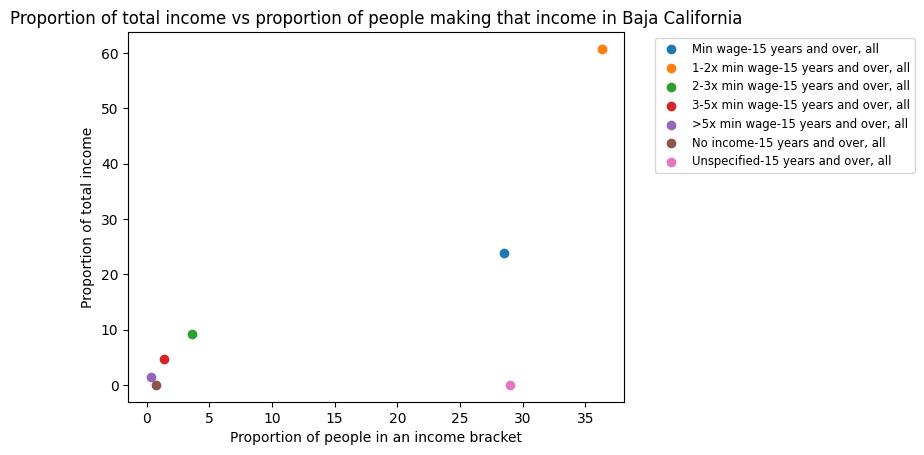

In [36]:
# Plot for Baja California
plotPropIncomeGraph('Baja California')

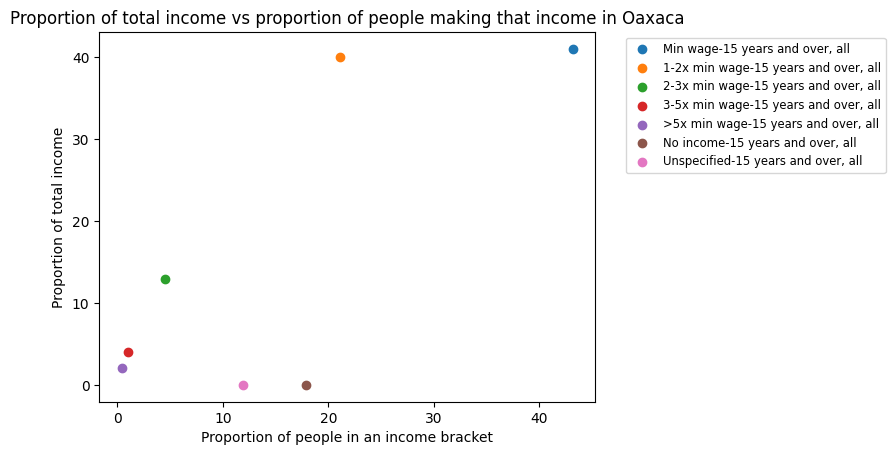

In [37]:
plotPropIncomeGraph('Oaxaca')

Although the equation seems to work as expected, the figures produced don't make sense. Most likely, continuous income data needs to be used instead of data abount income brackets, so that people can be sorted into income percentiles. Also, the weights should be adjusted to better reflect the proportion of the total income owned by each group. Additionally, in order to plot this against labor informality rates, an "income inequality score", like a gini index, would have to be calculated for each region and plotted against labor informality rates.

## Summary and Next Steps

The goal of this notebook was to further investigate labor informality and how it varied across geographical regions, and to explore those relationships with income and education. Overall, this notebook found that Mexico has just below 40% of its workers making minimum wage, and that the income stratification landscape varies by region, with northwestern regions including more people who make above minimum wage, and southeastern regions including more people who make minimum wage, or no income at all. Additionally, this notebook found that labor informality, education, and income are all related, with some regions consistently ranking lower on each. Finally, this notebook attempts to quantify income inequality by making Lorenz plots, but ultimately needs to have more specific income data for it to work.     

Next steps might include:
1. Obtaining more specific income data (continuous data about income) for each region so that the population can be sorted into quantiles
2. Making a map that shows labor informality and income inequality (gini index) more clearly to explore their relationship
3. Examining what industries are most dominant in wealthier areas and examining access to those industries